# Pandas Express
TTC-Delays project
Team Members:

Gaspare Castagna

Amirhossein Heidari

Avery Hoffer

Michael Metallo

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import glob

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [37]:

# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

# Assuming your CSV files are in the same directory as your script
files = glob.glob('analysis_data_*.csv')

# Initialize an empty list to store DataFrames
dfs = []

# Iterate through each file
for file in files:
    # Read the CSV file with low_memory=False option
    df = pd.read_csv(file, low_memory=False)
    
    # Filter rows where UTC_YEAR is 2022
    df_2022 = df[df['LOCAL_YEAR'] == 2022]
    
    # Append the filtered data to the list
    dfs.append(df_2022)

# Concatenate all DataFrames in the list
combined_data = pd.concat(dfs, ignore_index=True)

# Now, combined_data contains rows from all CSV files where UTC_YEAR is 2022
#Keep in mind that using low_memory=False might increase memory usage, and it's 

In [38]:
combined_data.head()

,Route,Day,Location,Incident,Min Delay,Min Gap,Vehicle,DateTime,analysis,temp,Unnamed: 0,LOCAL_HOUR,WIND_DIRECTION,WINDCHILL,PRECIP_AMOUNT,HUMIDEX,RELATIVE_HUMIDITY,LOCAL_YEAR,TEMP_FLAG,UTC_MONTH,UTC_DAY,LOCAL_DATE,STATION_PRESSURE,TEMP,UTC_YEAR,WIND_SPEED,LOCAL_DAY,DEW_POINT_TEMP,LOCAL_MONTH,UTC_DATE,VISIBILITY,weather
0,952,Tuesday,TERNMINAL 1,Operations - Operator,9.0,0.0,0.0,2022-01-04 06:02:00,ternminal1,2022-01-04 06:00:00,25579,6,27.0,-11.0,0.0,NaN,73.0,2022,NaN,1,4,2022-01-04 06:00:00,101.48,-4.2,2022,21.0,4,-8.3,1,2022-01-04T11:00:00,16.1,snow
1,953,Tuesday,MORNINGVIEW AND FINCH,Operations - Operator,14.0,28.0,0.0,2022-01-04 05:43:00,Morningview Trail at Old Finch Ave South Side,2022-01-04 06:00:00,25579,6,27.0,-11.0,0.0,NaN,73.0,2022,NaN,1,4,2022-01-04 06:00:00,101.48,-4.2,2022,21.0,4,-8.3,1,2022-01-04T11:00:00,16.1,snow
2,39,Tuesday,OLD FINCH AND LITTLES,Operations - Operator,10.0,25.0,0.0,2022-01-04 06:00:00,Finch Ave West at Goldfinch Crt East Side,2022-01-04 06:00:00,25579,6,27.0,-11.0,0.0,NaN,73.0,2022,NaN,1,4,2022-01-04 06:00:00,101.48,-4.2,2022,21.0,4,-8.3,1,2022-01-04T11:00:00,16.1,snow
3,97,Tuesday,QUEEN'S WUAY AND YONGE,Operations - Operator,15.0,15.0,8132.0,2022-01-04 05:32:00,The Queensway at Roncesvalles Ave,2022-01-04 06:00:00,25579,6,27.0,-11.0,0.0,NaN,73.0,2022,NaN,1,4,2022-01-04 06:00:00,101.48,-4.2,2022,21.0,4,-8.3,1,2022-01-04T11:00:00,16.1,snow
4,60,Tuesday,PIONEER VILLAGE STATIO,Operations - Operator,15.0,30.0,8171.0,2022-01-04 05:44:00,pioneervillagestatio,2022-01-04 06:00:00,25579,6,27.0,-11.0,0.0,NaN,73.0,2022,NaN,1,4,2022-01-04 06:00:00,101.48,-4.2,2022,21.0,4,-8.3,1,2022-01-04T11:00:00,16.1,snow


In [39]:
# Define the conditions and corresponding values for the 'weather' column
conditions = [
    (combined_data['TEMP'] >= 0) & (combined_data['PRECIP_AMOUNT'] > 0),
    (combined_data['TEMP'] < 0) & (combined_data['PRECIP_AMOUNT'] > 0),
    (combined_data['PRECIP_AMOUNT'] == 0),
    (combined_data['TEMP'].isna()) | (combined_data['PRECIP_AMOUNT'].isna())
]

values = ['rain', 'snow', 'dry', 'nothing']

# Use numpy's select function to apply the conditions and update the 'weather' column
combined_data['weather'] = np.select(conditions, values, default=combined_data['weather'])

In [40]:
# Convert 'LOCAL_DATE' column to datetime type
combined_data['LOCAL_DATE'] = pd.to_datetime(combined_data['LOCAL_DATE'])

# Define a function to check if a date is a holiday
def is_holiday(date):
    holidays = [
        '2022-01-01', '2022-02-21', '2022-04-15', '2022-04-18',
        '2022-05-23', '2022-07-01', '2022-08-01', '2022-09-05',
        '2022-10-10', '2022-11-11', '2022-12-25', '2022-12-26'
    ]
    return 1 if date.strftime('%Y-%m-%d') in holidays else 0

# Create a new column 'is_holiday'
combined_data['HOLIDAY'] = combined_data['LOCAL_DATE'].apply(is_holiday)

In [41]:
print(combined_data.columns)
# Write the DataFrame to a CSV file
# Specify the file path where you want to save the CSV file
file_path = 'output.csv'
combined_data.to_csv(file_path, index=False)

Index(['Route', 'Day', 'Location', 'Incident', 'Min Delay', 'Min Gap',
       'Vehicle', 'DateTime', 'analysis', 'temp', 'Unnamed: 0', 'LOCAL_HOUR',
       'WIND_DIRECTION', 'WINDCHILL', 'PRECIP_AMOUNT', 'HUMIDEX',
       'RELATIVE_HUMIDITY', 'LOCAL_YEAR', 'TEMP_FLAG', 'UTC_MONTH', 'UTC_DAY',
       'LOCAL_DATE', 'STATION_PRESSURE', 'TEMP', 'UTC_YEAR', 'WIND_SPEED',
       'LOCAL_DAY', 'DEW_POINT_TEMP', 'LOCAL_MONTH', 'UTC_DATE', 'VISIBILITY',
       'weather', 'HOLIDAY'],
      dtype='object')


In [8]:
def feature_engineering(data):
    '''Return features based on data 
    '''
    data_copy=data.copy()
    # Map Days,Incidents, and Weather
    
    data_copy['WEEKDAY'] = data_copy['Day'].map({'Monday': 0, 'Tuesday': 1,'Wednesday': 2,'Thursday': 3,
                                              'Friday': 4,'Saturday': 5,'Sunday': 6})
    data_copy['INCIDENT_TYPE'] = data_copy['Incident'].map({'Operations - Operator': 0, 'Vision': 1,'Mechanical': 2,'Security': 3,
                                              'Diversion': 4,'Collision - TTC': 5,'Cleaning - Unsanitary': 6,'Emergency Services': 7,
                                                   'Utilized Off Route': 8,'Road Blocked - NON-TTC Collision': 9,'Investigation': 10,
                                                   'General Delay': 11,'Held By': 12,'Cleaning - Disinfection': 13,'Late Entering Service': 14})
    data_copy['WEATHER'] = data_copy['weather'].map({'dry': 0, 'rain': 1,'snow': 2})
    feature_selected= ['HOLIDAY','WEEKDAY','INCIDENT_TYPE', 'WEATHER','LOCAL_HOUR','WIND_DIRECTION','WINDCHILL','PRECIP_AMOUNT','HUMIDEX',
                       'RELATIVE_HUMIDITY','STATION_PRESSURE','TEMP','WIND_SPEED','DEW_POINT_TEMP',
                       'LOCAL_MONTH','VISIBILITY']
    # Assign to new DF
    data_copy = data_copy[feature_selected]
    # Impute missing values (for example, filling with the mean)
    data_copy = data_copy.fillna(data_copy.mean())
    return data_copy[feature_selected]

X = feature_engineering(combined_data)

# Labels
y = combined_data["Min Delay"]

# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
# Print the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_val.shape}")

X_train shape: (46660, 16)
X_test shape: (11665, 16)
y_train shape: (46660,)
y_test shape: (11665,)


In [9]:
# Count the number of NaN values in each column
nan_count_per_column = y_train.isna().sum()

# Count the total number of NaN values in the entire DataFrame
total_nan_count = nan_count_per_column.sum()

# Print the results
print(f"Number of NaN values per column:\n{nan_count_per_column}")
print(f"\nTotal number of NaN values in the DataFrame: {total_nan_count}")

# Count the number of NaN values in each column
nan_count_per_column = X_train.isna().sum()

# Count the total number of NaN values in the entire DataFrame
total_nan_count = nan_count_per_column.sum()

# Print the results
print(f"Number of NaN values per column:\n{nan_count_per_column}")
print(f"\nTotal number of NaN values in the DataFrame: {total_nan_count}")

Number of NaN values per column:
0

Total number of NaN values in the DataFrame: 0
Number of NaN values per column:
HOLIDAY              0
WEEKDAY              0
INCIDENT_TYPE        0
WEATHER              0
LOCAL_HOUR           0
WIND_DIRECTION       0
WINDCHILL            0
PRECIP_AMOUNT        0
HUMIDEX              0
RELATIVE_HUMIDITY    0
STATION_PRESSURE     0
TEMP                 0
WIND_SPEED           0
DEW_POINT_TEMP       0
LOCAL_MONTH          0
VISIBILITY           0
dtype: int64

Total number of NaN values in the DataFrame: 0


In [10]:
# Instantiate a classifier model
model = RandomForestClassifier()

In [11]:
# Fit and predict
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_pred = model.predict(X_val)

In [13]:
print(f1_score(y_val, y_pred, average='weighted'))

0.12029253788982604


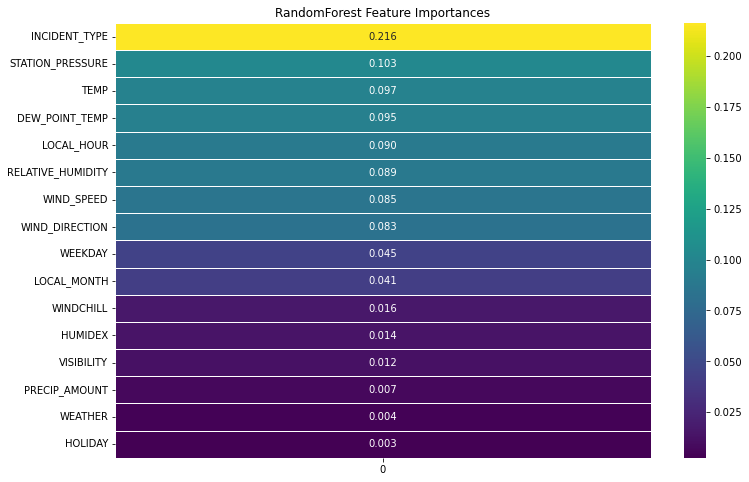

In [14]:
# # Get feature importances
# # List with features
# v=feature_engineering(combined_data).columns.tolist()
# feature_importances = model.feature_importances_
# # Create a DataFrame to display the importances along with the feature names
# importance_df = pd.DataFrame({'Feature': [v[i] for i in range(X.shape[1])], 'Importance': feature_importances})

# #Sort the DataFrame by importance in descending order
# importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Get feature importances from the trained model
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(feature_importances), annot=True, cmap='viridis', fmt='.3f', linewidths=.5)
plt.title('RandomForest Feature Importances')
plt.show()

In [108]:
def feature_engineering(data):
    '''Return features based on data 
    '''
    data_copy=data.copy()
    # Map Days,Incidents, and Weather
    
    data_copy['WEEKDAY'] = data_copy['Day'].map({'Monday': 0, 'Tuesday': 1,'Wednesday': 2,'Thursday': 3,
                                              'Friday': 4,'Saturday': 5,'Sunday': 6})
    data_copy['INCIDENT_TYPE'] = data_copy['Incident'].map({'Operations - Operator': 0, 'Vision': 1,'Mechanical': 2,'Security': 3,
                                              'Diversion': 4,'Collision - TTC': 5,'Cleaning - Unsanitary': 6,'Emergency Services': 7,
                                                   'Utilized Off Route': 8,'Road Blocked - NON-TTC Collision': 9,'Investigation': 10,
                                                   'General Delay': 11,'Held By': 12,'Cleaning - Disinfection': 13,'Late Entering Service': 14})
    data_copy['WEATHER'] = data_copy['weather'].map({'dry': 0, 'rain': 1,'snow': 2})
    feature_selected= ['INCIDENT_TYPE','STATION_PRESSURE','TEMP','DEW_POINT_TEMP','LOCAL_HOUR','RELATIVE_HUMIDITY','WIND_SPEED',
      'WIND_DIRECTION','WEEKDAY']
    # Assign to new DF
    data_copy = data_copy[feature_selected]
    # Impute missing values (for example, filling with the mean)
    data_copy = data_copy.fillna(data_copy.mean())
    return data_copy[feature_selected]

# df_10000=combined_data.sample(n=10000, random_state=42)


X = feature_engineering(combined_data)

# Labels
y = combined_data["Min Delay"]

# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)


# Instantiate a classifier model
model = RandomForestClassifier()
# Fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f1_score(y_val, y_pred, average='weighted'))
# ['INCIDENT_TYPE','STATION_PRESSURE','TEMP','DEW_POINT_TEMP','LOCAL_HOUR','RELATIVE_HUMIDITY','WIND_SPEED',
#       'WIND_DIRECTION','WEEKDAY','LOCAL_MONTH','WINDCHILL','HUMIDEX','VISIBILITY','PRECIP_AMOUNT','WEATHER','HOLIDAY']

0.12457079811191324


Mean Squared Error: 2961.5439125510366
R-squared: 0.0076902550637253375


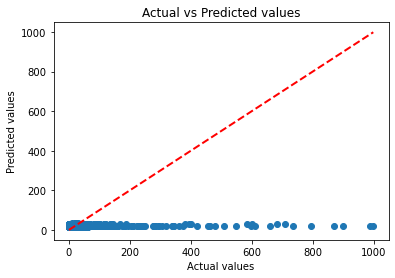

In [82]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_squared_error, r2_score
# # Create a linear regression model
# model = LinearRegression()

# # Train the model on the training set
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_val)

# # Evaluate the model
# mse = mean_squared_error(y_val, y_pred)
# r2 = r2_score(y_val, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')

# # Plot the predicted values against the actual values
# plt.scatter(y_val, y_pred)
# plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
# plt.xlabel('Actual values')
# plt.ylabel('Predicted values')
# plt.title('Actual vs Predicted values')
# plt.show()